# INITIAL DATA LOADING

In [1]:
#1.LOAD THE DATA

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## 1.DATA UNDERSTANDING

### 1.1 Data shape and data types

In [3]:
pd.set_option('display.max_columns',50)

data =pd.read_excel("MHPatientDetails.xlsx")

In [4]:
#how many rows and columns
data.shape

(9393, 58)

In [5]:
#first 10 rows dropped - messy values
data= data.drop([0,1,2,3,4,5,6,7,8,9])

In [6]:
# print all column names 
print(data.columns.values)

['id' 'hospitalId' 'admissionDate' 'yearOfBirth' 'ageAtAdmission'
 'occupation' 'tribe' 'highestEdu' 'gender' 'employmentStatus'
 'maritalStatus' 'religion' 'fatherAge' 'fatherDeceased'
 'fatherUnknownYearOfDeath' 'fatherYearOfDeath' 'fatherReason'
 'childhoodLiving' 'presentLiving' 'motherAge' 'motherDeceased'
 'motherUnknownYearOfDeath' 'motherYearOfDeath' 'motherReason'
 'maritalStatusMother' 'maritalStatusFather' 'positionAtBirthMother'
 'positionAtBirthFather' 'pastAdmission' 'mentalIllnessHis'
 'typeMentalIllness' 'psychoactiveSubUse' 'psychoactiveSubAge'
 'psychoactiveSubType' 'chronicIllness' 'truancyHis' 'numEpisodes'
 'familyMentalIllnessHis' 'familyMentalType' 'suicideHis' 'suicideType'
 'familyType' 'forensicIssue' 'homicideHis' 'medication'
 'patientHouseType' 'accompaniedPerson' 'personStayWithPatient'
 'diagnosis' 'primarySchool' 'carePathway' 'referral' 'complaints'
 'secSchool' 'tertiarySchool' 'useOfMobile' 'useOfSocialMedia' 'timeStamp']


In [7]:
# print all data types 
data.dtypes

id                           int64
hospitalId                  object
admissionDate               object
yearOfBirth                 object
ageAtAdmission              object
occupation                  object
tribe                       object
highestEdu                  object
gender                      object
employmentStatus            object
maritalStatus               object
religion                    object
fatherAge                   object
fatherDeceased              object
fatherUnknownYearOfDeath    object
fatherYearOfDeath           object
fatherReason                object
childhoodLiving             object
presentLiving               object
motherAge                   object
motherDeceased              object
motherUnknownYearOfDeath    object
motherYearOfDeath           object
motherReason                object
maritalStatusMother         object
maritalStatusFather         object
positionAtBirthMother       object
positionAtBirthFather       object
pastAdmission       

In [8]:
#change data type for int/float for numerical variables
data = data.astype({'yearOfBirth' : 'int64'})
data = data.astype({'ageAtAdmission' : 'int64'})
data = data.astype({'fatherAge' : 'int64'})
data = data.astype({'motherAge' : 'int64'})
data = data.astype({'fatherYearOfDeath' : 'float64'})
data = data.astype({'motherYearOfDeath' : 'float64'})
data = data.astype({'positionAtBirthMother' : 'int64'})
data = data.astype({'positionAtBirthFather' : 'int64'})
data = data.astype({'pastAdmission' : 'int64'})
data = data.astype({'numEpisodes' : 'int64'})

### 1.2 Missing Values

In [9]:
# Missing values in a dataset 
mv = data.isnull().sum()/len(data)*100
print()
print("Missing Values:")
print (mv)


Missing Values:
id                           0.000000
hospitalId                  99.722903
admissionDate                0.000000
yearOfBirth                  0.000000
ageAtAdmission               0.000000
occupation                  29.446872
tribe                        0.000000
highestEdu                   0.000000
gender                       0.000000
employmentStatus             0.000000
maritalStatus                0.000000
religion                     0.000000
fatherAge                    0.000000
fatherDeceased               0.000000
fatherUnknownYearOfDeath     0.000000
fatherYearOfDeath           84.269423
fatherReason                90.727912
childhoodLiving              0.000000
presentLiving                0.000000
motherAge                    0.000000
motherDeceased               0.000000
motherUnknownYearOfDeath     0.000000
motherYearOfDeath           91.271448
motherReason                95.481189
maritalStatusMother          0.000000
maritalStatusFather          0.00

### 1.3 Outliers

In [10]:
data.describe()  #describe numerical variables 

,id,yearOfBirth,ageAtAdmission,fatherAge,fatherYearOfDeath,motherAge,motherYearOfDeath,positionAtBirthMother,positionAtBirthFather,pastAdmission,numEpisodes
count,9.383000e+03,9383.000000,9383.000000,9383.000000,1476.000000,9383.000000,819.000000,9383.000000,9383.000000,9383.000000,9383.000000
mean,-2.279186e+06,1982.831717,29.203986,35.340296,2002.101626,35.475115,2004.295482,1.928914,1.901844,0.078653,0.315571
std,1.243639e+09,18.143619,31.524769,22.034924,13.966807,19.999227,14.139477,2.052539,2.115574,0.525207,0.828672
min,-2.147353e+09,1919.000000,-1770.000000,10.000000,1919.000000,10.000000,1919.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.084937e+09,1974.000000,20.000000,20.000000,1994.000000,20.000000,1997.500000,0.000000,0.000000,0.000000,0.000000
50%,-7.639944e+06,1983.000000,28.000000,20.000000,2004.000000,28.000000,2006.000000,1.000000,1.000000,0.000000,0.000000
75%,1.085450e+09,1993.000000,38.000000,54.000000,2012.000000,51.000000,2019.000000,3.000000,3.000000,0.000000,0.000000
max,2.147387e+09,2019.000000,98.000000,115.000000,2019.000000,115.000000,2019.000000,19.000000,50.000000,19.000000,20.000000


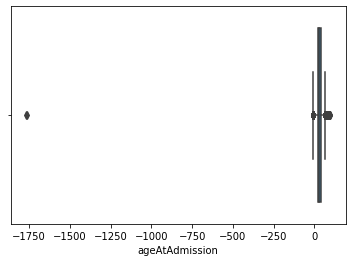

In [11]:
#ageAtadmission must be checked -> min number -1700 ??

import seaborn as sns
sns.boxplot(x=data['ageAtAdmission'])

In [12]:
data[(data['ageAtAdmission'] < -1000 )] # check the negative values 

,id,hospitalId,admissionDate,yearOfBirth,ageAtAdmission,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherAge,motherDeceased,motherUnknownYearOfDeath,motherYearOfDeath,motherReason,maritalStatusMother,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
1069,-1093823025,NaN,0209-12-18,1971,-1762,Business services and administration managers,Igbo,Secondary,Female,Self-employed,Married,Christian,20,false,false,NaN,NaN,With both parents,Family,20,false,false,NaN,NaN,Married,...,NaN,[],No,0,false,NaN,false,NaN,polygamous,None,NaN,Typical,Face2face,Relative,Relative,[18/12/2009-> psychotic illness],Public,Hospitals,Formal,[],Public,NaN,low,none,2019-08-12 17:23:49
5174,-1910118984,NaN,0201-02-13,1971,-1770,Personal service workers,Yoruba,Secondary,Female,Unemployed,Never Married,Islam,64,false,false,NaN,NaN,With both parents,Family,60,false,false,NaN,NaN,Married,...,NaN,[],No,0,false,NaN,false,NaN,Monogamous,None,No,Typical,Flat Duplex,Sibling,Relative,[13/02/2013-> paranoid schizophrenia.],Public,NaN,Informal,"[13/02/2013-> false accusations - 4-Year, 13/0...",Public,NaN,Unknown,Unknown,2019-08-31 00:50:41


In [13]:
data[(data['ageAtAdmission'] < 0)] # check the negative values 

,id,hospitalId,admissionDate,yearOfBirth,ageAtAdmission,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherAge,motherDeceased,motherUnknownYearOfDeath,motherYearOfDeath,motherReason,maritalStatusMother,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
18,1709943659,NaN,2009-07-09,2018,-9,Business services and administration managers,Yoruba,Higher Education,Male,Employed,Never Married,Islam,58,false,false,NaN,NaN,Mother,Family,52,false,false,NaN,NaN,Married,...,NaN,[],No,0,false,NaN,false,NaN,polygamous,None,No,Typical,Flat Duplex,Sibling,Sibling,[09/07/2009-> Anxiety Disorder],Public,Hospitals,Informal,[09/07/2009-> poor sleep\npain the scalp (5 mo...,Public,Public,low,low,2019-07-19 12:27:52
41,433386253,NaN,2009-07-08,2018,-9,NaN,Igbo,Higher Education,Male,Unemployed,Never Married,Christian,56,false,false,NaN,NaN,With both parents,Family,55,false,false,NaN,NaN,Married,...,NaN,[],No,2,false,NaN,false,NaN,Monogamous,Arrests,No,Atypical,Flat Duplex,Parent,Parent,[08/07/2009-> Partial compplex seizure disorder ],Private,Hospitals,Informal,"[08/07/2009-> convulsion,unusual behaviours - ...",Missionary,Public,Medium,Medium,2019-07-26 11:12:42
62,-241067178,NaN,2009-08-11,2018,-9,"Metal, machinery and related trades workers",Yoruba,Uneducated,Male,Self-employed,Married,Islam,115,false,false,NaN,NaN,With both parents,Family,60,false,false,NaN,NaN,Married,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Typical,Flat Duplex,Spouse,Spouse,[11/08/2009-> Acute psychotic illness],NaN,Hospitals,Informal,[11/08/2009-> Talking incoherently - 4-Day],NaN,NaN,Unknown,Unknown,2019-08-02 11:19:15
109,-1649011761,NaN,2009-08-18,2018,-9,NaN,Igbo,Higher Education,Male,Unemployed,Married,Christian,62,false,false,NaN,NaN,With both parents,Relatives,114,false,false,NaN,NaN,Married,...,NaN,[],NaN,0,false,NaN,false,NaN,polygamous,None,NaN,Typical,Flat Duplex,Sibling,Sibling,[18/08/2009-> Relapsed schizophrenia /mental d...,Public,Hospitals,Informal,"[18/08/2009-> irrational behaviour,refusal - 2...",Public,Public,Medium,Unknown,2019-08-01 10:28:58
121,-219083677,NaN,2009-08-18,2018,-9,Electrical and electronic trades workers,Yoruba,Higher Education,Male,Employed,Married,Christian,10,false,false,NaN,NaN,With both parents,Family,10,false,false,NaN,NaN,Married,...,NaN,[],No,1,false,NaN,false,NaN,polygamous,None,No,Typical,Face2face,Sibling,Spouse,[18/08/2009-> Paranoid schizophrenia],NaN,NaN,Informal,"[18/08/2009-> Irrational talk, abnormal behavi...",NaN,NaN,High,Medium,2019-08-01 11:18:19
125,92202051,NaN,2009-08-24,2018,-9,"Sales, marketing and development managers",Igbo,Uneducated,Female,Self-employed,Married,Christian,10,false,false,NaN,NaN,With both parents,Family,10,false,false,NaN,NaN,Married,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Both,Flat Duplex,Relative,Relative,[24/08/2009-> Severe deoressive episode \n(an...,NaN,Hospitals,Informal,"[24/08/2009-> poor sleep , - 2-Year]",NaN,NaN,Medium,Unknown,2019-08-01 11:38:52
143,499884952,NaN,2009-08-24,2018,-9,NaN,Yoruba,Primary,Female,Unemployed,Widow,Islam,20,true,true,NaN,illness,With both parents,Family,20,true,true,NaN,illness,Married,...,NaN,[],NaN,1,false,NaN,false,NaN,polygamous,None,NaN,Typical,Face2face,Relative,Relative,[24/08/2009-> Relapsed psychotic disorder],Public,Hospitals,Informal,"[24/08/2009-> poor sleep,irrational talk - 4-Day]",NaN,NaN,Medium,Unknown,2019-08-01 12:45:57
150,-1476606781,NaN,2009-08-25,2018,-9,Student,Yoruba,Uneducated,Female,Unemployed,Never Married,Christian,60,false,false,NaN,NaN,With both parents,Family,35,fa

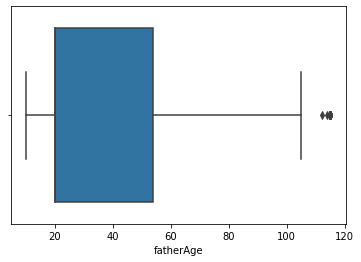

In [14]:
sns.boxplot(x=data['fatherAge']) #fatherAge

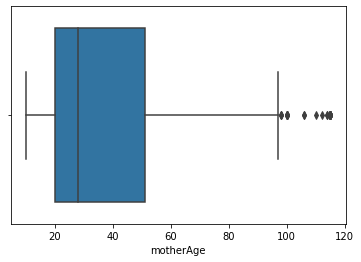

In [15]:
sns.boxplot(x=data['motherAge']) #motherAge

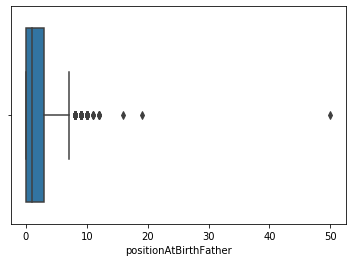

In [16]:
sns.boxplot(x=data['positionAtBirthFather']) #'positionAtBirthFather

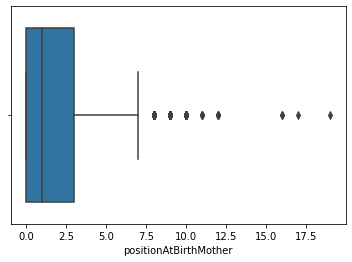

In [17]:
sns.boxplot(x=data['positionAtBirthMother']) #positionAtBirthMother

# 2. Dimensionality Reduction - part 1

### 2.1 High Correlation Filter - 1st attempt before encoding 

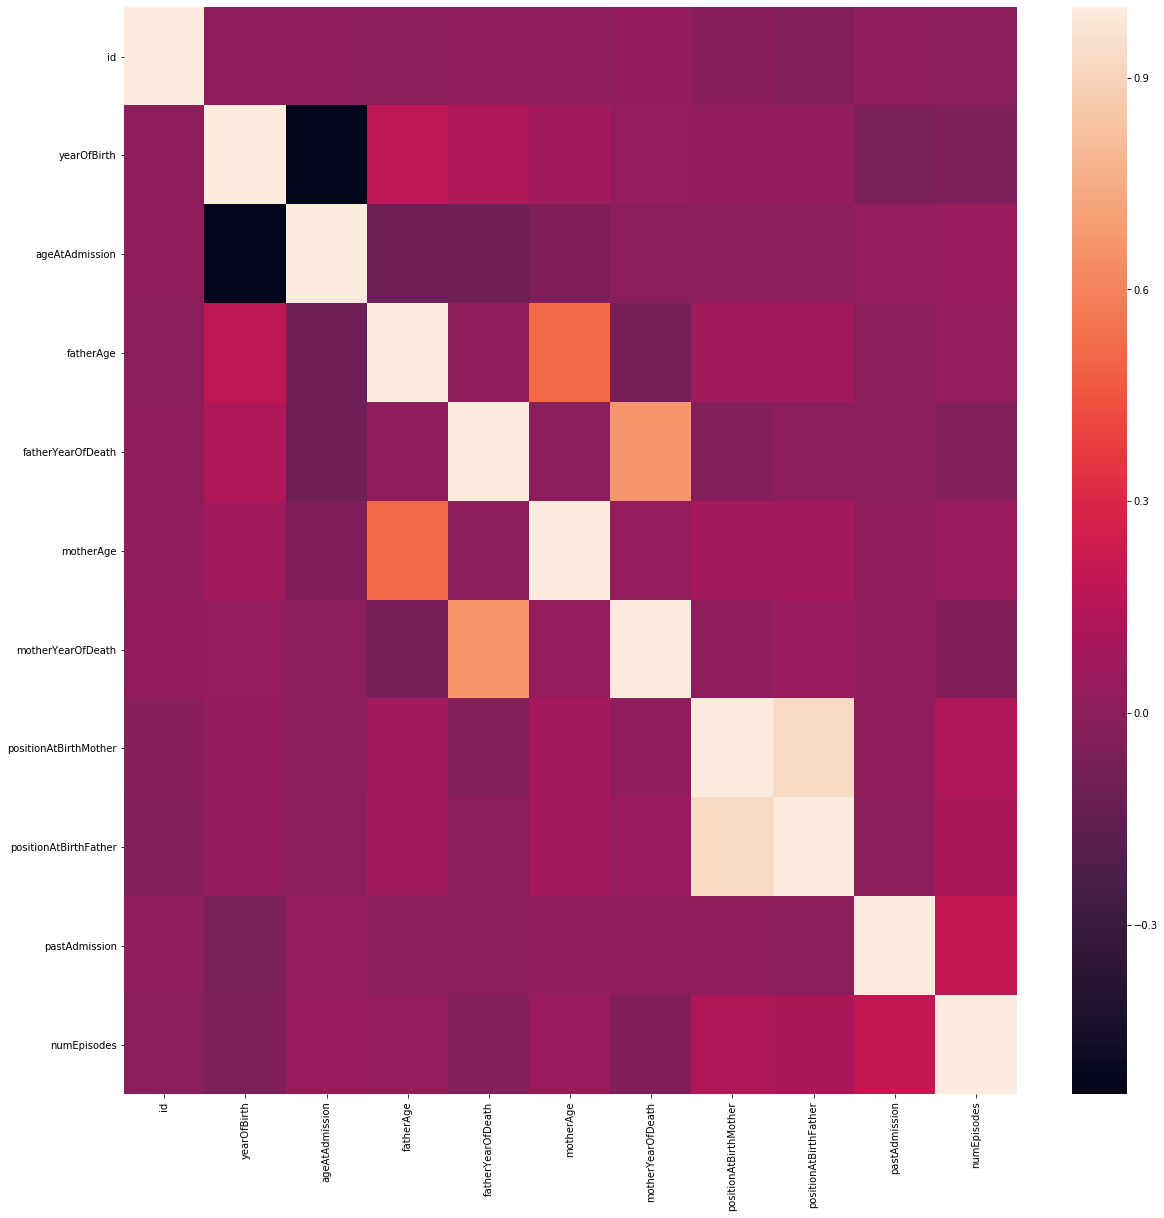

In [18]:
#Correlation between variables before encoding 
# High correlation. if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping
plt.figure(figsize=(20,20)) 
sns.heatmap(data.corr())

In [19]:
#print table with correlation values
data.corr() 

,id,yearOfBirth,ageAtAdmission,fatherAge,fatherYearOfDeath,motherAge,motherYearOfDeath,positionAtBirthMother,positionAtBirthFather,pastAdmission,numEpisodes
id,1.000000,0.010435,0.009520,-0.001308,0.012570,0.009643,0.020806,-0.020428,-0.025912,0.008480,-0.010343
yearOfBirth,0.010435,1.000000,-0.540341,0.182018,0.125797,0.075095,0.030062,0.024551,0.021876,-0.053151,-0.051778
ageAtAdmission,0.009520,-0.540341,1.000000,-0.103320,-0.109026,-0.044312,-0.008777,0.002003,0.001934,0.031148,0.038006
fatherAge,-0.001308,0.182018,-0.103320,1.000000,0.015321,0.515380,-0.066325,0.067653,0.078248,0.003416,0.034501
fatherYearOfDeath,0.012570,0.125797,-0.109026,0.015321,1.000000,-0.010698,0.663769,-0.025471,0.000569,0.004324,-0.030640
motherAge,0.009643,0.075095,-0.044312,0.515380,-0.010698,1.000000,0.031544,0.090101,0.089879,0.015814,0.051999
motherYearOfDeath,0.020806,0.030062,-0.008777,-0.066325,0.663769,0.031544,1.000000,0.016599,0.042731,0.015260,-0.038341
positionAtBirthMother,-0.020428,0.024551,0.002003,0.067653,-0.025471,0.090101,0.016599,1.000000,0.928155,0.014580,0.123043
positionAtBirthFather,-0.025912,0.021876,0.001934,0.078248,0.000569,0.089879,0.042731,0.928155,1.000000,0.004551,0.109659
pastAdmission,0.008480,-0.053151,0.031148,0.003416,0.004324,0.015814,0.015260,0.014580,0.004551,1.000000,0.195948


In [20]:
# AgeatAddmision yearofBirth - --0.540341
# fatherAge vs motherAge - 0.515380
# fatherYearOfDeath vs motherYearOfDeath - 0.663769
# positionAtBirthMother vs  positionAtBirthFather  -0.928155

        #DECISION: DROP THESE COLUMNS (ONE FROM EACH PAIR)

In [21]:
data = data.drop(columns=['yearOfBirth', 'motherAge', 'motherYearOfDeath', 'positionAtBirthMother'])

# 3. Data preparation

### 3.1  ageAtAdmission

In [22]:
# typo correction 
data.loc[data['admissionDate'] == '0209-12-18', 'admissionDate'] = '2009-12-18'
data.loc[data['admissionDate'] == '0201-02-13', 'admissionDate'] = '2010-02-13'

# calculation of the correct age
age1= 2009-1971
age2= 2010-1971

# replace incorrect age values
data.loc[data['ageAtAdmission'] == -1762, 'ageAtAdmission'] = age1
data.loc[data['ageAtAdmission'] == -1770, 'ageAtAdmission'] = age2

In [23]:
#Remove rows with negative age (difficult to replace with mean/median, because it may create false results)  
data = data[(data[['ageAtAdmission']] > 0).all(axis=1)]

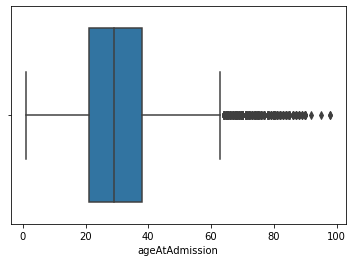

In [24]:
sns.boxplot(x=data['ageAtAdmission']) #no negative values

### 3.2 ocuppation

In [25]:
# Display all rows when ageAtAdmission is lower than 16 and occupation is not equal to 'Student'
    # We assume that if someone is under 16, the occupation the patient should have is a 'Student'.
    # Many inconsistencies found, e.g. row 13 (age: 1, occupation: Business services, maritalStatus: Married).
    # Even if we change occupation to Student, it will be inconsistent with the rest of the variables.
    # DECISION: drop these rows
data[data['occupation'].notnull() & (data['ageAtAdmission'] < 16) & (data['occupation'] != 'Student')]

,id,hospitalId,admissionDate,ageAtAdmission,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,motherReason,maritalStatusMother,maritalStatusFather,positionAtBirthFather,pastAdmission,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
10,193094355,NaN,2019-07-23,1,Managing directors and chief executives,Hausa,Higher Education,Male,Employed,Married,Christian,20,false,false,NaN,NaN,Mother,Care home,false,false,NaN,Married,divorced,0,0,...,NaN,[],Yes,0,false,NaN,false,NaN,polygamous,Conviction,NaN,Atypical,others,Friend,none,[],Private,Traditional,Informal,[],Public,Mixed,none,low,2019-07-09 16:54:18
13,-1826875612,NaN,2019-07-17,1,Business services and administration managers,Hausa,Higher Education,Male,Employed,Married,Christian,20,false,false,NaN,NaN,In care home,Unknown,false,false,NaN,Widow,Widow,0,0,...,NaN,[],No,0,false,NaN,false,NaN,Serial polygamy,Conviction,No,Atypical,Terraced,Spouse,Spouse,[],Private,Traditional,Informal,[],Public,Public,Medium,low,2019-07-09 18:56:23
124,780399128,NaN,2019-08-01,10,Legislators and senior officials,Igbo,Secondary,Male,Unemployed,Never Married,Islam,20,true,false,1999.0,sucude,With both parents,Family,true,false,fatal,Never Married,Widow,5,2,...,Stimulants,[01/08/2019-> testing 56 - 5-Month],Yes,1,true,depression,true,Anomic suicide,Serial polygamy,Arrests,Yes,Typical,others,Samaritan,Parent,[01/08/2019-> testing 56],Private,Traditional,Informal,[06/08/2019-> testing 56 - 6-Day],Private,Private,low,low,2019-08-01 11:38:29
129,1098072327,NaN,2019-08-01,14,Legislators and senior officials,Yoruba,Uneducated,Male,Unemployed,Never Married,unknown,32,true,false,1934.0,56,With both parents,Family,true,true,56,Never Married,Never Married,7,3,...,Depressants,[01/08/2019-> test 56\n - 2-Month],Yes,2,true,bipolar disorder,true,Anomic suicide,Serial polygamy,Arrests,Yes,Typical,Face2face,Parent,Relative,[01/08/2019-> 56 ],Private,Traditional,Formal,[01/08/2019-> 56 - 2-Month],Private,Private,low,Medium,2019-08-01 11:58:08
451,-1292526018,Patient 5,2019-05-08,1,Personal service workers,Yoruba,Primary,Male,Self-employed,Never Married,Islam,20,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,5,1,...,NaN,[08/05/2019-> Asthmatic - 3-Year],NaN,0,true,psychotic disorders,false,NaN,Monogamous,None,NaN,Typical,Flat Duplex,Parent,Parent,[08/05/2019-> Psychotic disorder KIV schizophr...,Private,Hospitals,Informal,"[08/05/2019-> poor sleep,low mood,low energy,s...",NaN,NaN,Medium,Medium,2019-08-06 14:05:24
645,1842347646,NaN,2019-08-26,1,Business services and administration managers,Yoruba,Secondary,Female,Unemployed,Married,Islam,20,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Typical,Flat Duplex,Parent,Parent,[26/10/2009-> psychotic disorder],Public,Traditional,Formal,[],Public,Public,low,low,2019-08-07 19:44:56
1151,-394140021,NaN,2009-12-25,12,Personal service workers,Yoruba,Higher Education,Male,Self-employed,Never Married,Christian,10,true,false,1996.0,NaN,With both parents,Family,false,false,NaN,Widow,Married,1,0,...,NaN,[],NaN,0,false,NaN,false,NaN,polygamous,None,NaN,Typical,Face2face,Parent,Parent,[25/12/2009-> severe depressive disorder with ...,Private,NaN,Informal,[25/12/2009-> irrelevant talk\nirrational beha...,Public,Public,Very High,High,2019-08-13 09:53:34
1732,-231406375,NaN,2010-03-29,15,"Sales, marketing and development managers",Yoruba,Uneducated,Female,Self-employed,Married,Christian,20,true,true,NaN,il

In [26]:
data = data.drop(data[(data['occupation'].notnull()) & (data['ageAtAdmission'] < 16) & (data['occupation'] != 'Student')].index)

In [27]:
# We assume that someone who is under 3 years old should not have an occupation.
    #Inconsistencies in the data
    #Difficult to decide if the ageAtAdmission, occupation or maritalStatus is wrong
    #DECISION: drop these rows to avoid inconsistencies
data[(data['ageAtAdmission'] < 3 ) & (data['occupation'].notnull())]

,id,hospitalId,admissionDate,ageAtAdmission,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,motherReason,maritalStatusMother,maritalStatusFather,positionAtBirthFather,pastAdmission,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
448,-530399166,Patient 4,2019-07-19,1,Student,Others,Higher Education,Female,Unemployed,Never Married,Christian,62,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,4,0,...,Marijuana,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Both,Flat Duplex,Parent,Parent,[19/07/2019-> MBD due to multiple substance u...,Private,Hospitals,Informal,"[19/07/2019-> use of cannabis(7years),use of c...",Public,Private,Medium,Unknown,2019-08-06 13:44:39
915,-1936719492,NaN,2019-11-18,1,Student,Igbo,Higher Education,Female,Unemployed,Married,Christian,20,true,true,NaN,NaN,With both parents,Family,false,false,NaN,Widow,Married,1,0,...,Alcohol,[],No,0,true,psychotic disorders,false,NaN,Monogamous,None,No,Both,Flat Duplex,None,Spouse,[18/11/2009-> mild depression.\n(antidepressant)],Public,NaN,Informal,[18/11/2009-> abnormal sensation in the head...,Public,Public,Unknown,Unknown,2019-08-10 14:58:55
7362,758974285,NaN,2014-03-10,2,Student,Yoruba,Uneducated,Male,Unemployed,Never Married,Islam,35,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,3,0,...,NaN,[],No,0,false,NaN,false,NaN,Monogamous,None,No,Both,Face2face,Parent,Parent,[10/03/2014-> Delayed developmental milestobes...,NaN,Hospitals,Informal,[10/03/2014-> Delayed developmental milestones...,NaN,NaN,low,none,2019-09-06 17:17:05
7367,702824061,NaN,2014-03-10,2,Student,Yoruba,Uneducated,Female,Unemployed,Never Married,Christian,20,false,false,NaN,NaN,Father,Relatives,true,false,NaN,Married,Widow,1,0,...,NaN,[],No,0,false,NaN,false,NaN,Monogamous,None,No,Both,Face2face,Relative,Relative,[10/03/2014-> Delayed developmental milestones...,NaN,Hospitals,Informal,[10/03/2014-> Delayed developmental milestones...,NaN,NaN,none,none,2019-09-06 17:22:24
7377,-1834377628,NaN,2012-01-14,2,Student,Yoruba,Uneducated,Female,Unemployed,Never Married,Christian,48,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Both,Flat Duplex,Parent,Parent,[14/01/2012-> speech impairment\ndown syndrome...,NaN,NaN,Informal,[14/01/2012-> delayed milestones\ndelayed spee...,NaN,NaN,Unknown,Unknown,2019-09-06 17:36:32
7510,636948654,NaN,2014-03-24,2,Student,Yoruba,Primary,Male,Unemployed,Never Married,Islam,20,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,3,0,...,NaN,[],No,1,false,NaN,false,NaN,Monogamous,None,No,Both,Face2face,Parent,Parent,[24/03/2014-> seizure disorder- generalised to...,NaN,Hospitals,Informal,[24/03/2015-> convulsions\n\n\n - 2-Year],NaN,NaN,Unknown,Unknown,2019-09-06 21:29:19
8139,421932761,NaN,2015-05-07,2,Student,Igbo,Uneducated,Female,Unemployed,Never Married,Christian,43,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Both,Flat Duplex,Parent,Parent,[07/05/2015-> seizure disorder\nanticonvulsant...,NaN,NaN,Informal,[07/05/2015-> delayed developmental milestones...,NaN,NaN,Unknown,Unknown,2019-09-09 20:57:17
8248,-481085834,NaN,2011-10-07,2,Student,Yoruba,Uneducated,Male,Unemployed,Never Married,Christian,20,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,No,Atypic

In [28]:
data = data.drop(data[(data['ageAtAdmission'] < 3 ) & (data['occupation'].notnull())].index)

In [29]:
# We replace missing values for variable "occupation" with the value "Student" when the following conditions are met:
    #1.ageAtAdmission IS lower than 18
    #2.employmentStatus IS Unemployed
    #3.highestEdu IS NOT "Uneducated"
data.loc[(data['occupation'].isnull()) & (data['ageAtAdmission'] < 18) & (data['employmentStatus'] == 'Unemployed') & (data['highestEdu'] != 'Uneducated')  , 'occupation'] = 'Student'

In [30]:
# Missing values in a dataset for occupation
mocc = data['occupation'].isnull().sum()/len(data)*100
print()
print("Missing Values:")
print (mocc)


Missing Values:
27.352682497801233


In [31]:
#The rest of the missing values for occupation will be replaced with mode based on highestEdu level that patient has
    #We can check the occupation value that appears the most often for each highestEdu group using groupby() method  
g = data.groupby(['highestEdu'])  
g.first() 

,id,hospitalId,admissionDate,ageAtAdmission,occupation,tribe,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,motherReason,maritalStatusMother,maritalStatusFather,positionAtBirthFather,pastAdmission,mentalIllnessHis,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
highestEdu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Higher Education,582951664,Patient 3,2019-07-10,58,Retail and wholesale trade managers,Hausa,Male,Employed,Married,Christian,20,false,false,2009.0,heart failure,On streets,Cohabitant,false,false,illness,divorced,divorced,0,0,false,...,Marijuana,[],No,0,false,psychotic disorders,false,Fatalistic suicide,Serial polygamy,Arrests,No,Both,others,Samaritan,Samaritan,[],Public,Traditional,Informal,[],Public,Mixed,low,low,2019-07-09 18:32:16
Primary,1674681467,Patient 18,2009-08-20,27,Other clerical support workers,Yoruba,Male,Unemployed,Never Married,Christian,63,false,false,2019.0,illness,With both parents,Family,false,false,illnesss,Married,divorced,4,1,true,...,Marijuana,[],No,1,false,Other disorder,false,Egoistic suicide,Monogamous,None,No,Typical,Flat Duplex,Parent,Parent,[20/08/2009-> Organic psychosis \n(Anti-depre...,Private,Hospitals,Formal,[20/08/2009-> unusual behaviour - 8-Year],Public,Mixed,Medium,Unknown,2019-08-02 13:47:44
Secondary,-700523468,Patient 1,2019-07-11,41,Professional services managers,Igbo,Male,Employed,Never Married,Christian,20,false,false,2019.0,Road traffic accident,Mother,Care home,false,false,old age,Married,Married,0,0,false,...,Marijuana,[],Yes,0,false,personality disorders,false,Anomic suicide,Serial polygamy,Arrests,Yes,Typical,others,Samaritan,Samaritan,[],Missionary,Traditional,Informal,[],Missionary,Missionary,High,low,2019-07-09 17:45:35
Uneducated,-759363329,Patient 2,2019-01-01,48,Professional services managers,Others,Male,Employed,divorced,Islam,47,true,false,1984.0,old age\t,With both parents,Civil partner,true,false,unkown,divorced,Never Married,0,0,true,...,Marijuana,[16/07/2019-> headache - 1 - Day],Yes,5,true,depression,true,Egoistic suicide,Serial polygamy,Conviction,Yes,Typical,Face2face,Relative,Relative,"[03/07/2009-> tummy tuck, hand tight, 01/07/2...",Missionary,Traditional,Formal,[08/07/2019-> pain in hand - 2-Day],Mixed,Mixed,Medium,low,2019-07-18 12:13:22


In [32]:
#Based on results replace the missing values for occupation
data.loc[(data['occupation'].isnull()) & (data['highestEdu'] == 'Higher Education') , 'occupation'] = 'Retail and wholesale trade managers'
data.loc[(data['occupation'].isnull()) & (data['highestEdu'] == 'Primary') , 'occupation'] = 'Other clerical support workers'
data.loc[(data['occupation'].isnull()) & (data['highestEdu'] == 'Secondary') , 'occupation'] = 'Professional services managers'
data.loc[(data['occupation'].isnull()) & (data['highestEdu'] == 'Uneducated') , 'occupation'] = 'Professional services managers'

### 3.3 maritalStatus

In [33]:
# We assume that a patient under 16 cannot have the maritalStatus = "Married". Rows with these values will be deleted.
data[(data['ageAtAdmission'] < 16) & (data['maritalStatus'] != 'Never Married')]

,id,hospitalId,admissionDate,ageAtAdmission,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,motherReason,maritalStatusMother,maritalStatusFather,positionAtBirthFather,pastAdmission,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
2710,-1232732075,NaN,2019-08-16,1,Professional services managers,Yoruba,Secondary,Female,Self-employed,Married,Islam,20,false,false,NaN,NaN,Mother,Relatives,false,false,NaN,Married,Married,0,0,...,NaN,[],No,0,false,NaN,false,NaN,Monogamous,None,No,Typical,Face2face,Relative,Relative,[16/08/2010-> acute psychotic disorder],Public,Hospitals,Informal,[16/08/2019-> suspiciousness\nhearing strange ...,Public,NaN,low,low,2019-08-20 20:42:14
3670,-1265728466,NaN,2010-11-08,15,Student,Others,Primary,Female,Unemployed,Married,Christian,75,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,6,1,...,NaN,[],No,2,false,NaN,false,NaN,Monogamous,None,No,Both,Face2face,Spouse,Spouse,[08/11/2010-> relapsed severe depression with ...,NaN,NaN,Formal,"[08/11/2010-> talking excessively, auditory ha...",NaN,NaN,low,low,2019-08-24 11:15:42
7547,-1825139653,NaN,2011-01-10,10,Student,Yoruba,Uneducated,Female,Unemployed,divorced,Christian,56,false,false,NaN,NaN,Father,Family,false,false,NaN,divorced,divorced,2,0,...,NaN,[],No,0,false,NaN,false,NaN,Monogamous,None,No,Typical,Face2face,Parent,Parent,[10/01/2011-> 1. cerebral palsy\n2. severe me...,NaN,NaN,Formal,[10/01/2011-> inability to perform certain tas...,NaN,NaN,none,none,2019-09-06 23:12:07
8299,147335664,NaN,2014-11-10,9,Student,Yoruba,Secondary,Female,Employed,Married,Islam,20,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,4,0,...,NaN,[],No,0,false,NaN,false,NaN,polygamous,None,No,Both,Flat Duplex,Parent,Parent,[10/11/2014-> speech impairment.\n(multivitami...,Private,NaN,Informal,[10/11/2014-> inability to talk clearly. - 6-Y...,NaN,NaN,Unknown,Unknown,2019-09-10 18:16:50
8326,-558275653,NaN,2014-11-12,12,Student,Yoruba,Primary,Male,Unemployed,Married,unknown,30,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,1,0,...,NaN,[],No,0,false,NaN,false,NaN,Monogamous,None,No,Atypical,Flat Duplex,Parent,Parent,"[12/11/2014-> schizophrenia-like illness., 12/...",Private,NaN,Informal,"[12/11/2014-> convulsion - 11-Year, 12/11/2014...",NaN,NaN,none,none,2019-09-10 21:37:17
8422,-1475500928,NaN,2017-07-21,2,Professional services managers,Yoruba,Uneducated,Male,Employed,Married,Christian,37,false,false,NaN,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,None,NaN,Both,Flat Duplex,Parent,Parent,[21/07/2017-> Cerebral palsy\n(suplement)],NaN,Hospitals,Informal,[21/07/2017-> Delayed developmental milestone ...,NaN,NaN,none,none,2019-09-11 13:09:02


In [34]:
data = data.drop(data[(data['ageAtAdmission'] < 16) & (data['maritalStatus'] != 'Never Married')].index)

### 3.4 fatherYearofDeath

In [35]:
 #Replace the missing values with an appropriate text
          
    # Father Year of Death - not known means "Alive". 
        #To keep the column data type 'numerical:interval', the NaN will be replaced with 0. 
        #For the interval variables when the variable equals 0.0, there is none of that variable.

In [36]:
data["fatherYearOfDeath"]= data["fatherYearOfDeath"].fillna(0)


### 3.5 primarySchool, secSechool, tertiarySchool 

In [37]:
# Reason for missing values: level of highest education - patient could not attend specific school 
    # (for ex. higestEdu is "primary school" that means no value for secSchool column etc.)

In [38]:
#If the patient is 'uneducated' that means not attended to any schools 
#so the missing values for primarySchool, secSechool, tertiarySchool if 'highestEdu'='Uneducated' can be replaced with the value 'Not attended'

In [39]:
data.loc[data['highestEdu'] == 'Uneducated', 'primarySchool'] = 'Not attended'
data.loc[data['highestEdu'] == 'Uneducated', 'tertiarySchool'] = 'Not attended'
data.loc[data['highestEdu'] == 'Uneducated', 'secSchool'] = 'Not attended'

In [40]:
#If 'highestEdu'='Primary', then missing values for secSchool and tertiarySchool can be replaced with 'Not attended'
#If 'highestEdu'='Secondary', then missing values for tertiarySchool can be replaced with 'Not attended'

In [41]:
data.loc[data['highestEdu'] == 'Primary', 'secSchool'] = 'Not attended'
data.loc[data['highestEdu'] == 'Primary', 'tertiarySchool'] = 'Not attended'

data.loc[data['highestEdu'] == 'Secondary', 'tertiarySchool'] = 'Not attended'

In [42]:
# any missing values left
mpr = data['primarySchool'].isnull().sum()/len(data)*100
msec= data['secSchool'].isnull().sum()/len(data)*100
mter = data['tertiarySchool'].isnull().sum()/len(data)*100
print("Missing Values:")
print ("primarySchool :" + str(mpr) + " %")
print ("secSchool :" + str(msec) + " %")
print ("tertiarySchool:" + str(mter) + " %")

Missing Values:
primarySchool :22.55225522552255 %
secSchool :16.776677667766776 %
tertiarySchool:3.1463146314631465 %


In [43]:
# Other missing values will be replaced with mode

In [44]:
data['primarySchool'].mode()

0    Public
dtype: object

In [45]:
data.loc[data['primarySchool'].isnull(), 'primarySchool'] = 'Public'

In [46]:
data['secSchool'].mode() 

0    Public
dtype: object

In [47]:
data.loc[data['secSchool'].isnull(), 'secSchool'] = 'Public'

In [48]:
data['tertiarySchool'].value_counts() 

Not attended    6865
Public          1796
Private          129
Mixed              8
Missionary         6
Name: tertiarySchool, dtype: int64

In [49]:
data.loc[data['tertiarySchool'].isnull(), 'tertiarySchool'] = 'Public'

### 3.6 homicideHis

In [50]:
# If there is no forensic issue, it means there shouldn’t be a homicide history
# The missing values which meet that condition should be replaced with "No"
data.loc[(data['homicideHis'].isnull()) & (data['forensicIssue'] == 'None') , 'homicideHis'] = 'No'

In [51]:
# Print resluts when homicide history is null, but forensic issue is not equal to 'None'
data[(data['homicideHis'].isnull()) & (data['forensicIssue'] !='None')]

,id,hospitalId,admissionDate,ageAtAdmission,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,fatherReason,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,motherReason,maritalStatusMother,maritalStatusFather,positionAtBirthFather,pastAdmission,...,psychoactiveSubType,chronicIllness,truancyHis,numEpisodes,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,carePathway,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
45,1531781836,NaN,2009-07-20,29,Electrical and electronic trades workers,Yoruba,Secondary,Male,Self-employed,Never Married,Christian,65,false,false,0.0,NaN,Father,Family,false,false,NaN,divorced,Married,1,0,...,Marijuana,[],No,0,false,NaN,false,NaN,Monogamous,Arrests,NaN,Both,Face2face,Parent,Parent,[20/07/2009-> MBD due to use of cannabis with ...,Public,Hospitals,Informal,"[20/07/2009-> Smoking of india hemp,poor perso...",Public,Not attended,Unknown,Unknown,2019-07-26 15:26:59
49,461677288,NaN,2009-08-12,25,"Sales, marketing and development managers",Yoruba,Uneducated,Female,Self-employed,Never Married,Islam,60,false,false,0.0,NaN,With both parents,Family,false,false,NaN,Married,Married,2,0,...,NaN,[],NaN,0,false,NaN,false,NaN,Monogamous,Arrests,NaN,Typical,Flat Duplex,Spouse,Spouse,[12/08/2009-> BAD episode mania with psychoti...,Not attended,Hospitals,Informal,"[12/08/2009-> poor sleep,irrational talk,physi...",Not attended,Not attended,Medium,Unknown,2019-08-02 13:27:36
64,-58544507,NaN,2009-08-13,38,"Sales, marketing and development managers",Igbo,Secondary,Male,Self-employed,Never Married,Christian,20,true,false,1972.0,NaN,With both parents,Family,false,false,NaN,Widow,Married,0,0,...,NaN,[],No,0,false,NaN,true,Anomic suicide,Monogamous,Conviction,NaN,Typical,Flat Duplex,Relative,Relative,[13/08/2009-> paranoid schizophrenia\nmedicati...,Private,Spiritual,Formal,[13/08/2009-> poor sleep\nhearing strange voic...,Private,Not attended,Very High,Very High,2019-07-31 13:21:11
82,-2000977046,NaN,2009-08-05,31,Personal service workers,Yoruba,Secondary,Male,Self-employed,Never Married,Christian,66,false,false,0.0,NaN,With both parents,Family,true,false,NaN,Married,Married,0,0,...,Alcohol,[],NaN,0,false,NaN,false,NaN,Monogamous,Arrests,NaN,Typical,Flat Duplex,Parent,Parent,[05/08/2009-> severe depression\npsychosis\nme...,Public,NaN,Formal,[05/08/2009-> hearing voices\npoor sleep\nabno...,Public,Not attended,low,none,2019-07-31 17:12:26
92,1710398474,NaN,2019-07-17,60,Teaching professionals,Igbo,Higher Education,Female,Employed,Married,Christian,83,false,false,0.0,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],No,0,false,NaN,false,NaN,polygamous,Arrests,NaN,Typical,Flat Duplex,Relative,Relative,[17/07/2009-> auditory and visual hallucination],Public,Hospitals,Formal,[],Public,Public,low,none,2019-07-31 18:55:15
132,731565937,NaN,2009-08-24,37,Retail and wholesale trade managers,Yoruba,Higher Education,Female,Unemployed,Married,Christian,67,false,false,0.0,NaN,With both parents,Family,false,false,NaN,Married,Married,0,0,...,NaN,[],NaN,0,false,NaN,false,NaN,polygamous,Conviction,NaN,Typical,Flat Duplex,Parent,Parent,[24/08/2009-> Manic episode],Public,Hospitals,Informal,"[24/08/2009-> irritability,verbal aggression, ...",Public,Public,Medium,Unknown,2019-08-01 12:05:19
137,-2046409399,NaN,2009-08-24,35,Business services and administration managers,Yoruba,Higher Education,Male,Self-employed,Never Married,Christian,95,false,false,0.0,NaN,With both parents,Alone,false,false,NaN,Married,Married,4,1,...,NaN,[24/08/2009-> Diabeties - 9-Year],NaN,1,false,NaN,false,NaN,polygamous,Arrests,NaN,Typical,Flat Duplex,Sibling,Sibling,[24/08/2009-> Paranoid schizophrenia],Private,Hospitals,Informal,"[24/08/2009-> Poor sle

In [52]:
#Replace the rest missing values with mode
data['homicideHis'].mode()

0    No
dtype: object

In [53]:
data.loc[(data['homicideHis'].isnull()) & (data['forensicIssue'] != 'None') , 'homicideHis'] = 'No'

### 3.7 psychoactiveSubAge & psychoactiveSubType

In [54]:
# Missing values for psychoactiveSubAge and psychoactiveSubType - not known because psychoactiveSub not used
        #(see column psychoactiveSubUse)
        # To replace with 'False'

In [55]:
data["psychoactiveSubAge"]= data["psychoactiveSubAge"].fillna('False')
data["psychoactiveSubType"]= data["psychoactiveSubType"].fillna('False')

### 3.8 typeMentalIllness

In [56]:
#Missing values for typeMentalIllness because mentalIllnessHis is false 
        # To replace with "False" 

In [57]:
data["typeMentalIllness"]= data["typeMentalIllness"].fillna('False')

### 3.9 familyMentalType

In [58]:
#Missing familyMentalType because familyMentalIllnessHis is false
    # To replace with "False"

In [59]:
data["familyMentalType"]= data["familyMentalType"].fillna('False')

### 3.10 suicideType 

In [60]:
 #4.2.5 Missing suicideType because suicideHis is false
    # To replace with "False" 

In [61]:
data["suicideType"]= data["suicideType"].fillna('False')

### 3.11 fatherAge 

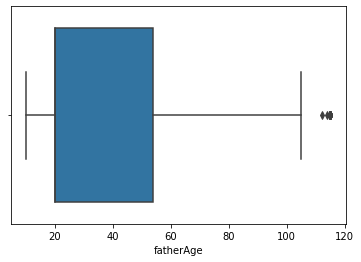

In [62]:
sns.boxplot(x=data['fatherAge']) #fatherAge

In [63]:
q1 = data['fatherAge'].quantile(0.25)
q3 = data['fatherAge'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

In [64]:
print ("Q1: " + str(q1))
print ("Q3: " + str(q3))
print (fence_high)
print (fence_low)


Q1: 20.0
Q3: 54.0
105.0
-31.0


In [65]:
# calculate median for fatherAge
medianfather = data['fatherAge'].median()
medianfather

20.0

In [66]:
# We assume that someone can become a father at least 16 years old. 
#To eliminate false data from our dataset, all values below 16 will be replaced by the median value.

data.loc[data['fatherAge'] < 16, 'fatherAge'] = 20

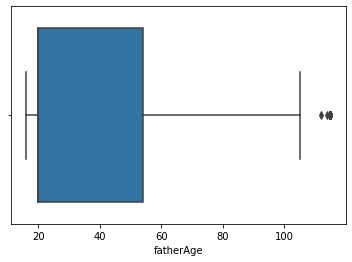

In [67]:
# lets check the outliers again now
sns.boxplot(x=data['fatherAge']) #fatherAge

In [68]:
q1 = data['fatherAge'].quantile(0.05)
q3 = data['fatherAge'].quantile(0.95)
iqr = q3-q1 #Interquartile range
fence_high = q3+1.5*iqr
print ("Q1: " + str(q1))
print ("Q3: " + str(q3))
print ("High fence " + str(fence_high))



Q1: 20.0
Q3: 75.0
High fence 157.5


In [69]:
# The high fence is very high 157.5 - not posible to represent the age
# DECISION: 3rd quartile treated as maximum value - all values above replaced woth median
data.loc[data['fatherAge'] > 75, 'fatherAge'] = medianfather

### 3.12 patientHouseType

In [70]:
#only 6% of missing data
# replace with mode
data['patientHouseType'].value_counts()

Flat Duplex    5246
Face2face      2120
Unknown         885
others          149
Terraced         96
Name: patientHouseType, dtype: int64

In [71]:
data.loc[(data['patientHouseType'].isnull()), 'patientHouseType'] = 'Flat Duplex'

In [72]:
#4.CHECK MISSING VALUES AGAIN

In [73]:
# Missing values in a dataset 
mv2 = data.isnull().sum()/len(data)*100
print()
print("Missing Values:")
print (mv2)


Missing Values:
id                           0.000000
hospitalId                  99.735974
admissionDate                0.000000
ageAtAdmission               0.000000
occupation                   0.000000
tribe                        0.000000
highestEdu                   0.000000
gender                       0.000000
employmentStatus             0.000000
maritalStatus                0.000000
religion                     0.000000
fatherAge                    0.000000
fatherDeceased               0.000000
fatherUnknownYearOfDeath     0.000000
fatherYearOfDeath            0.000000
fatherReason                90.858086
childhoodLiving              0.000000
presentLiving                0.000000
motherDeceased               0.000000
motherUnknownYearOfDeath     0.000000
motherReason                95.489549
maritalStatusMother          0.000000
maritalStatusFather          0.000000
positionAtBirthFather        0.000000
pastAdmission                0.000000
mentalIllnessHis             0.00

In [74]:
#Drop columns with significant missing data 
data = data.drop(columns=['hospitalId', 'carePathway', 'truancyHis', 'fatherReason', 'motherReason'])
data = data.drop(columns=['numEpisodes']) #useless when standing alone

### 3.13 presentLiving

In [75]:
data['presentLiving'].value_counts() 

Family            7243
Relatives          848
Alone              364
Civil partner      311
Unknown            161
Cohabitant          91
Care home           46
Streets             26
Name: presentLiving, dtype: int64

In [76]:
# Unkown treated as 0, it doesn't give us any information
# Replaced with mode
data.loc[data['presentLiving'].str.contains('Unknown', case=False), 'presentLiving'] = 'Family'

### 3.14 religion

In [77]:
data['religion'].value_counts() 

Christian      6897
Islam          2152
unknown          31
Traditional      10
Name: religion, dtype: int64

In [78]:
# Unkown treated as 0, it doesn't give us any information
# Replaced with mode
data.loc[data['religion'].str.contains('Unknown', case=False), 'religion'] = 'Christian'

### 3.15 useOfMobile

In [79]:
data['useOfMobile'].value_counts() 

Unknown      3759
Medium       2282
none         1254
low          1055
High          428
Very High     312
Name: useOfMobile, dtype: int64

In [80]:
# Unkown treated as 0, it doesn't give us any information
# Replaced with mode
data.loc[data['useOfMobile'].str.contains('Unknown', case=False), 'useOfMobile'] = 'Medium'

## High cardinality

### 3.16 occupation

In [ ]:
# occupation column values splitted between 10 occupation groups (International Standard Classification of Occupations)

In [81]:
data.loc[data['occupation'].str.contains('prof', case=False) | data['occupation'].str.contains('mana', case=False) | data['occupation'].str.contains('senior', case=False), 'occupation'] = 'Managers and Professionals'
data.loc[data['occupation'].str.contains('armed', case=False), 'occupation'] = 'Armed forces'
data.loc[data['occupation'].str.contains('service', case= False) |  data['occupation'].str.contains('sales', case= False) |  data['occupation'].str.contains('care', case= False), 'occupation']= 'Service and sales workers'
data.loc[data['occupation'].str.contains('Clean', case= False) |  data['occupation'].str.contains('Labourers', case= False) |  data['occupation'].str.contains('food', case= False)|  data['occupation'].str.contains('elem', case= False),'occupation'] = 'Elementary occupations'
data.loc[data['occupation'].str.contains('assem', case=False) | data['occupation'].str.contains('plant', case=False), 'occupation'] = 'Plant and machine operators and assemblers'
data.loc[data['occupation'].str.contains('craft', case=False) | data['occupation'].str.contains('building', case=False) | data['occupation'].str.contains('machinery', case=False) | data['occupation'].str.contains('electric', case=False)  , 'occupation'] = 'Craft and related trades workers'
data.loc[data['occupation'].str.contains('clerk', case=False) | data['occupation'].str.contains('clerical', case=False) , 'occupation'] = 'Clerical support workers'
data.loc[data['occupation'].str.contains('forest', case=False) | data['occupation'].str.contains('agricultural', case=False) |  data['occupation'].str.contains('fish', case=False), 'occupation'] = 'Skilled agricultural, forestry and fishery workers'

In [82]:

gk = data.groupby('occupation')
gk.first()

,id,admissionDate,ageAtAdmission,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherAge,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,maritalStatusMother,maritalStatusFather,positionAtBirthFather,pastAdmission,mentalIllnessHis,typeMentalIllness,psychoactiveSubUse,psychoactiveSubAge,psychoactiveSubType,chronicIllness,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp
occupation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Armed forces,90181828,2009-08-12,70,Yoruba,Primary,Male,Employed,Married,Islam,20.0,true,true,0.0,With both parents,Family,false,false,Married,Married,1,0,false,False,false,False,False,[],false,False,false,False,Monogamous,None,No,Typical,Flat Duplex,Spouse,Spouse,[12/08/2009-> Dementia],Private,Informal,"[12/08/2009-> poor sleep,irrelevant talk,unusu...",Not attended,Not attended,Medium,Unknown,2019-08-02 12:38:08
Clerical support workers,1674681467,2009-08-20,27,Yoruba,Primary,Male,Unemployed,Never Married,Christian,63.0,false,false,0.0,With both parents,Family,false,false,Married,divorced,4,1,true,psychotic disorders,false,False,False,[],false,False,false,False,Monogamous,None,No,Typical,Flat Duplex,Parent,Parent,[20/08/2009-> Organic psychosis \n(Anti-depre...,Private,Formal,[20/08/2009-> unusual behaviour - 8-Year],Not attended,Not attended,Medium,Unknown,2019-08-02 13:47:44
Craft and related trades workers,-764411694,2009-07-06,57,Yoruba,Secondary,Male,Employed,Married,Traditional,20.0,true,false,2019.0,With both parents,Family,true,false,Married,Married,0,0,false,False,false,False,False,[08/07/2008-> Epilepsy and Hypertension - Un...,false,False,false,False,polygamous,None,No,Typical,Flat Duplex,Relative,Relative,[06/07/2009-> Recurrent depression],Public,Informal,[],Public,Not attended,Medium,none,2019-07-23 11:35:18
Elementary occupations,995688020,2009-08-14,55,Igbo,Uneducated,Female,Self-employed,Widow,Christian,20.0,true,true,0.0,With both parents,Relatives,false,false,Widow,Married,2,0,false,False,false,False,False,[],false,False,false,False,Monogamous,None,No,Typical,Face2face,Relative,Relative,[14/08/2009-> Paranoid Schizophrenia],Not attended,Informal,[14/08/2010-> Insominia\nirrelevantly suspicio...,Not attended,Not attended,low,none,2019-08-01 09:42:10
Information and communications technicians,156015353,2009-10-10,26,Others,Higher Education,Male,Employed,Never Married,Christian,75.0,false,false,0.0,With both parents,Family,false,false,Married,Married,0,0,false,False,false,False,False,[],false,False,false,False,Monogamous,None,No,Atypical,Unknown,Parent,Parent,[10/10/2009-> BAD current episode],Public,Informal,[10/10/2009-> Undue sadness\nIrritability\nExc...,Public,Public,Medium,Unknown,2019-08-07 15:45:51
Managers and Professionals,-700523468,2019-07-11,41,Igbo,Secondary,Male,Employed,Never Married,Christian,20.0,false,false,0.0,Mother,Care home,false,false,Married,Married,0,0,false,False,false,False,False,[],false,False,false,False,Serial polygamy,Arrests,Yes,Typical,others,Samaritan,Samaritan,[],Missionary,Informal,[],Missionary,Not attended,High,low,2019-07-09 17:45:35
Plant and machine operators and assemblers,-1006313699,2009-08-05,65,Yoruba,Secondary,Male,Employed,Married,Christian,20.0,false,false,0.0,With both parents,Streets,true,true,Married,Married,2,0,true,False,false,False,False,"[05/08/2009-> RTA,surgery - 3-Year]",false,False,false,False,polygamous,None,No,Both,Flat Duplex,Sibling,Sibling,[05/08/2009-> psychotic disorder],Public,Formal,"[05/08/2009-> poor sleep,poor appertite,talk i...",Public,Not attended,Medium,Unknown,2019-07-23 12:18:32
Service and sales workers,-1009446340,2009-06-07,29,Others,Primary,Female,Self-employed,Never Married,Christian,53.

### 3.17 diagnosis

In [83]:
data.loc[data['diagnosis'].str.contains('Sch', case=False), 'diagnosis'] = 'Schizophrenia'

In [84]:
data.loc[data['diagnosis'].str.contains('demen', case=False), 'diagnosis'] = 'Dementia'

In [85]:
data.loc[data['diagnosis'].str.contains('depre', case=False), 'diagnosis'] = 'Depression'

In [86]:
data.loc[data['diagnosis'].str.contains('auti', case=False), 'diagnosis'] = 'Autism'

In [87]:
data.loc[data['diagnosis'].str.contains('Seizure', case=False), 'diagnosis'] = 'Seizure disorder'

In [88]:
data.loc[data['diagnosis'].str.contains('Psychotic', case=False), 'diagnosis'] = 'psychotic disorder'

In [89]:
data.loc[data['diagnosis'].str.contains('anx', case=False), 'diagnosis'] = 'Anxiety disorder'

In [90]:
data.loc[data['diagnosis'].str.contains('mbd', case=False), 'diagnosis'] = 'MBD'

In [91]:
data.loc[data['diagnosis'].str.contains('bipo', case=False), 'diagnosis'] = 'Bipolar'

In [92]:
data.loc[data['diagnosis'].str.contains('hall', case=False), 'diagnosis'] = 'Hallucination'

In [93]:
data.loc[data['diagnosis'].str.contains('adh', case=False), 'diagnosis'] = 'ADHD'

In [94]:
data.loc[data['diagnosis'].str.contains('organic', case=False), 'diagnosis'] = 'Organic mental disorder'

In [95]:
data.loc[(~data["diagnosis"].str.contains('Depression')) & (~data["diagnosis"].str.contains('Schizophrenia')) & (~data["diagnosis"].str.contains('Dementia')) & (~data["diagnosis"].str.contains('Autism')) & (~data["diagnosis"].str.contains('No')) & (~data["diagnosis"].str.contains('Seizure disorder')) & (~data["diagnosis"].str.contains('psychotic disorder')) & (~data["diagnosis"].str.contains('Anxiety disorder')) & (~data["diagnosis"].str.contains('MBD')) & (~data["diagnosis"].str.contains('Bipolar')) & (~data["diagnosis"].str.contains('Hallucination')) & (~data["diagnosis"].str.contains('ADHD'))  &  (~data["diagnosis"].str.contains('Organic mental disorder')) , 'diagnosis'] = 'Other'

In [96]:
data.loc[data['diagnosis'].str.contains('No obvious psychopathy', case=False), 'diagnosis'] = 'Other'

In [97]:
data['diagnosis'].unique()

array(['Other', 'Depression', 'Seizure disorder', 'psychotic disorder',
       'Dementia', 'Schizophrenia', 'Anxiety disorder', 'MBD', 'Bipolar',
       'Organic mental disorder', 'Hallucination', 'ADHD', 'Autism'],
      dtype=object)

### 3.18 chronicIllness

In [98]:
data.loc[data['chronicIllness'].str.contains('hyperten', case=False), 'chronicIllness'] = 'High Blood Pressure'
data.loc[data['chronicIllness'].str.contains('hiv', case=False) | data['chronicIllness'].str.contains('aids', case=False), 'chronicIllness'] = 'HIV'
data.loc[data['chronicIllness'].str.contains('diab', case=False), 'chronicIllness'] = 'Diabetes'
data.loc[data['chronicIllness'].str.contains('tuberculosis', case=False), 'chronicIllness'] = 'Tuberculosis'
data.loc[data['chronicIllness'].str.contains('typhoid', case=False), 'chronicIllness'] = 'Typhoid'
data.loc[data['chronicIllness'].str.contains('head', case=False), 'chronicIllness'] = 'Head injury'
data.loc[data['chronicIllness'].str.contains('seizure', case=False), 'chronicIllness'] = 'Seizure'
data.loc[data['chronicIllness'].str.contains('Asthma', case=False), 'chronicIllness'] = 'Asthma'
data.loc[data['chronicIllness'].str.contains('sleep', case=False) | data['chronicIllness'].str.contains('insom', case=False), 'chronicIllness'] = 'Problem with sleep'
data.loc[data['chronicIllness'].str.contains('Convul', case=False), 'chronicIllness'] = 'Convulsion'
data.loc[(data['chronicIllness'] == '[]') , 'chronicIllness'] = 'None'
data.loc[(~data["chronicIllness"].str.contains('High Blood Pressure')) & (~data["chronicIllness"].str.contains('HIV')) & (~data["chronicIllness"].str.contains('Diabetes')) & (~data["chronicIllness"].str.contains('Tuberculosis')) & (~data["chronicIllness"].str.contains('None')) & (~data["chronicIllness"].str.contains('Typhoid')) & (~data["chronicIllness"].str.contains('Head injury')) & (~data["chronicIllness"].str.contains('Seizure')) & (~data["chronicIllness"].str.contains('Asthma')) & (~data["chronicIllness"].str.contains('Problem with sleep')) & (~data["chronicIllness"].str.contains('Convulsion')), 'chronicIllness'] = 'Other'

In [99]:
data['chronicIllness'].unique()

array(['None', 'Head injury', 'High Blood Pressure', 'Other',
       'Tuberculosis', 'Seizure', 'Diabetes', 'Asthma', 'HIV', 'Typhoid',
       'Convulsion', 'Problem with sleep'], dtype=object)

### 3.19  ageAtAdmission'

In [100]:
#Creating the different age groups
#First group 0 - 20

data['ageAtAdmissiongroup'] = data['ageAtAdmission']

data['ageAtAdmissiongroup'] = np.where((data['ageAtAdmission'] <= 20), #Identifies the case to apply to
                           '0 - 20',      #This is the value that is inserted
                           data['ageAtAdmissiongroup'])      #This is the column that is affected


#Second group 21-30
data['ageAtAdmissiongroup'] = np.where((data['ageAtAdmission'] >= 21)
                           & (data['ageAtAdmission'] <= 30), #Identifies the case to apply to
                           '21 - 30',      #This is the value that is inserted
                           data['ageAtAdmissiongroup'])      #This is the column that is affected
#Third group 31-40

data['ageAtAdmissiongroup'] = np.where((data['ageAtAdmission'] >= 31)
                           & (data['ageAtAdmission'] <= 40), #Identifies the case to apply to
                           '31 - 40',      #This is the value that is inserted
                           data['ageAtAdmissiongroup'])      #This is the column that is affected
#Fourth group 41-60

data['ageAtAdmissiongroup'] = np.where((data['ageAtAdmission'] >= 41)
                           & (data['ageAtAdmission'] <= 60), #Identifies the case to apply to
                           '41 - 60',      #This is the value that is inserted
                           data['ageAtAdmissiongroup'])      #This is the column that is affected

#Fifth group +60

data.loc[data['ageAtAdmission'] > 60, 'ageAtAdmissiongroup'] = '60+'

In [101]:
#Now we can drop old column 'ageAtAdmission'
data = data.drop(['ageAtAdmission'], axis=1)

### 3.20 fatherAge

In [102]:
data['fatherAgegroups'] = data['fatherAge']

#First group 
data['fatherAgegroups'] = np.where((data['fatherAge'] >= 16)
                           & (data['fatherAge'] <= 40), #Identifies the case to apply to
                           '16 - 40',      #This is the value that is inserted
                           data['fatherAgegroups'])      #This is the column that is affected
# Second group

data['fatherAgegroups'] = np.where((data['fatherAge'] >= 41)
                           & (data['fatherAge'] <= 60), #Identifies the case to apply to
                           '41 - 60',      #This is the value that is inserted
                           data['fatherAgegroups'])      #This is the column that is affected
#Third group

data.loc[data['fatherAge'] > 60, 'fatherAgegroups'] = '60+'

In [103]:
#Now we can drop old column 'fatherAge'
data = data.drop(['fatherAge'], axis=1)

### 3.21 pastAdmission

In [104]:
data['pastAdmissiongr'] = data['pastAdmission']

# None
data['pastAdmissiongr'] = np.where((data['pastAdmission'] == 0), #Identifies the case to apply to
                           'None',      #This is the value that is inserted
                           data['pastAdmissiongr'])      #This is the column that is affected

# lower than 5
data['pastAdmissiongr'] = np.where((data['pastAdmission'] > 0) & (data['pastAdmission'] < 5), #Identifies the case to apply to
                           '1-5',      #This is the value that is inserted
                           data['pastAdmissiongr'])      #This is the column that is affected   
# 5 and more
data['pastAdmissiongr'] = np.where((data['pastAdmission'] >= 5), #Identifies the case to apply to
                           '5+',      #This is the value that is inserted
                           data['pastAdmissiongr'])      #This is the column that is affected   

### 3.22 positionatBirth

In [105]:
gk1 = data.groupby('positionAtBirthFather')
gk1.first()

,id,admissionDate,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,maritalStatusMother,maritalStatusFather,pastAdmission,mentalIllnessHis,typeMentalIllness,psychoactiveSubUse,psychoactiveSubAge,psychoactiveSubType,chronicIllness,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp,ageAtAdmissiongroup,fatherAgegroups,pastAdmissiongr
positionAtBirthFather,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-700523468,2019-07-11,Managers and Professionals,Igbo,Secondary,Male,Employed,Never Married,Christian,false,false,0.0,Mother,Care home,false,false,Married,Married,0,false,False,false,False,False,None,false,False,false,False,Serial polygamy,Arrests,Yes,Typical,others,Samaritan,Samaritan,Other,Missionary,Informal,[],Missionary,Not attended,High,low,2019-07-09 17:45:35,41 - 60,16 - 40,None
1,1727801504,2009-06-04,Managers and Professionals,Yoruba,Secondary,Female,Self-employed,Married,Christian,false,false,0.0,With both parents,Streets,false,false,Married,Married,0,false,False,false,False,False,Head injury,false,False,false,False,Monogamous,None,No,Typical,Unknown,Parent,Spouse,Seizure disorder,Public,Formal,"[04/06/2009-> headache - 1-Year, 04/07/2009-> ...",Public,Not attended,none,none,2019-07-18 13:08:51,21 - 30,41 - 60,None
2,-1006313699,2009-08-05,Plant and machine operators and assemblers,Yoruba,Secondary,Male,Employed,Married,Christian,false,false,0.0,With both parents,Streets,true,true,Married,Married,0,true,False,false,False,False,Other,false,False,false,False,polygamous,None,No,Both,Flat Duplex,Sibling,Sibling,psychotic disorder,Public,Formal,"[05/08/2009-> poor sleep,poor appertite,talk i...",Public,Not attended,Medium,Unknown,2019-07-23 12:18:32,60+,16 - 40,None
3,163431088,2009-08-04,Plant and machine operators and assemblers,Yoruba,Secondary,Male,Employed,Never Married,Islam,false,false,0.0,With both parents,Family,false,false,Married,Married,0,false,False,false,False,False,None,false,False,false,False,Monogamous,None,No,Typical,Face2face,Parent,Parent,Seizure disorder,Public,Informal,[13/07/2009-> Convulsion characterised by jerk...,Public,Not attended,Medium,low,2019-07-24 17:09:22,21 - 30,41 - 60,None
4,1674681467,2009-08-20,Clerical support workers,Yoruba,Primary,Male,Unemployed,Never Married,Christian,false,false,0.0,With both parents,Family,false,false,Married,divorced,1,true,psychotic disorders,false,False,False,None,false,False,false,False,Monogamous,None,No,Typical,Flat Duplex,Parent,Parent,Depression,Private,Formal,[20/08/2009-> unusual behaviour - 8-Year],Not attended,Not attended,Medium,Unknown,2019-08-02 13:47:44,21 - 30,60+,1-5
5,-272238051,2009-08-05,Managers and Professionals,Yoruba,Uneducated,Male,Self-employed,Married,Christian,false,false,0.0,With both parents,Civil partner,false,false,Married,Married,0,false,False,false,False,False,None,false,False,false,False,polygamous,None,No,Typical,Face2face,Spouse,Spouse,Depression,Not attended,Informal,[08/07/2019-> Poor Sleep\nShaking of body\nHea...,Not attended,Not attended,Medium,none,2019-07-18 12:50:13,41 - 60,16 - 40,None
6,-1817572436,2019-07-26,Managers and Professionals,Yoruba,Uneducated,Male,Unemployed,Never Married,Christian,true,false,2019.0,With both parents,Alone,true,false,Never Married,Never Married,2,false,False,false,False,False,None,false,False,true,Fatalistic suicide,Serial polygamy,Arrests,Yes,Typical,Face2face,Parent,Parent,Other,Not attended,Formal,[08/07/2019-> kaka - 4-Week],Not attended,Not attended,low,low,2019-07-26 14:49:43,21 - 30,16 - 40,1-5
7,-1784735881,2009-08-13,Student,Yoruba,Secondary,Male,Unemployed,Never Married,Christian,false,false,0.0,With both 

In [106]:
Q1 = data['positionAtBirthFather'].quantile(0.05)
Q3 = data['positionAtBirthFather'].quantile(0.95)
IQR = Q3 - Q1
fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR


print ("Q1: " + str(Q1))
print ("Q3: " + str(Q3))
print (fence_high)
print (fence_low)

Q1: 0.0
Q3: 6.0
15.0
-9.0


In [107]:
medianpos = data['positionAtBirthFather'].median()
medianpos

1.0

In [108]:
data.loc[data['positionAtBirthFather'] > 15, 'positionAtBirthFather'] = medianpos

In [109]:
gk1 = data.groupby('positionAtBirthFather')
gk1.first()

,id,admissionDate,occupation,tribe,highestEdu,gender,employmentStatus,maritalStatus,religion,fatherDeceased,fatherUnknownYearOfDeath,fatherYearOfDeath,childhoodLiving,presentLiving,motherDeceased,motherUnknownYearOfDeath,maritalStatusMother,maritalStatusFather,pastAdmission,mentalIllnessHis,typeMentalIllness,psychoactiveSubUse,psychoactiveSubAge,psychoactiveSubType,chronicIllness,familyMentalIllnessHis,familyMentalType,suicideHis,suicideType,familyType,forensicIssue,homicideHis,medication,patientHouseType,accompaniedPerson,personStayWithPatient,diagnosis,primarySchool,referral,complaints,secSchool,tertiarySchool,useOfMobile,useOfSocialMedia,timeStamp,ageAtAdmissiongroup,fatherAgegroups,pastAdmissiongr
positionAtBirthFather,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-700523468,2019-07-11,Managers and Professionals,Igbo,Secondary,Male,Employed,Never Married,Christian,false,false,0.0,Mother,Care home,false,false,Married,Married,0,false,False,false,False,False,None,false,False,false,False,Serial polygamy,Arrests,Yes,Typical,others,Samaritan,Samaritan,Other,Missionary,Informal,[],Missionary,Not attended,High,low,2019-07-09 17:45:35,41 - 60,16 - 40,None
1.0,1727801504,2009-06-04,Managers and Professionals,Yoruba,Secondary,Female,Self-employed,Married,Christian,false,false,0.0,With both parents,Streets,false,false,Married,Married,0,false,False,false,False,False,Head injury,false,False,false,False,Monogamous,None,No,Typical,Unknown,Parent,Spouse,Seizure disorder,Public,Formal,"[04/06/2009-> headache - 1-Year, 04/07/2009-> ...",Public,Not attended,none,none,2019-07-18 13:08:51,21 - 30,41 - 60,None
2.0,-1006313699,2009-08-05,Plant and machine operators and assemblers,Yoruba,Secondary,Male,Employed,Married,Christian,false,false,0.0,With both parents,Streets,true,true,Married,Married,0,true,False,false,False,False,Other,false,False,false,False,polygamous,None,No,Both,Flat Duplex,Sibling,Sibling,psychotic disorder,Public,Formal,"[05/08/2009-> poor sleep,poor appertite,talk i...",Public,Not attended,Medium,Unknown,2019-07-23 12:18:32,60+,16 - 40,None
3.0,163431088,2009-08-04,Plant and machine operators and assemblers,Yoruba,Secondary,Male,Employed,Never Married,Islam,false,false,0.0,With both parents,Family,false,false,Married,Married,0,false,False,false,False,False,None,false,False,false,False,Monogamous,None,No,Typical,Face2face,Parent,Parent,Seizure disorder,Public,Informal,[13/07/2009-> Convulsion characterised by jerk...,Public,Not attended,Medium,low,2019-07-24 17:09:22,21 - 30,41 - 60,None
4.0,1674681467,2009-08-20,Clerical support workers,Yoruba,Primary,Male,Unemployed,Never Married,Christian,false,false,0.0,With both parents,Family,false,false,Married,divorced,1,true,psychotic disorders,false,False,False,None,false,False,false,False,Monogamous,None,No,Typical,Flat Duplex,Parent,Parent,Depression,Private,Formal,[20/08/2009-> unusual behaviour - 8-Year],Not attended,Not attended,Medium,Unknown,2019-08-02 13:47:44,21 - 30,60+,1-5
5.0,-272238051,2009-08-05,Managers and Professionals,Yoruba,Uneducated,Male,Self-employed,Married,Christian,false,false,0.0,With both parents,Civil partner,false,false,Married,Married,0,false,False,false,False,False,None,false,False,false,False,polygamous,None,No,Typical,Face2face,Spouse,Spouse,Depression,Not attended,Informal,[08/07/2019-> Poor Sleep\nShaking of body\nHea...,Not attended,Not attended,Medium,none,2019-07-18 12:50:13,41 - 60,16 - 40,None
6.0,-1817572436,2019-07-26,Managers and Professionals,Yoruba,Uneducated,Male,Unemployed,Never Married,Christian,true,false,2019.0,With both parents,Alone,true,false,Never Married,Never Married,2,false,False,false,False,False,None,false,False,true,Fatalistic suicide,Serial polygamy,Arrests,Yes,Typical,Face2face,Parent,Parent,Other,Not attended,Formal,[08/07/2019-> kaka - 4-Week],Not attended,Not attended,low,low,2019-07-26 14:49:43,21 - 30,16 - 40,1-5
7.0,-1784735881,2009-08-13,Student,Yoruba,Secondary,Male,Unemployed,Never Married,Christian,false,fals

In [110]:
data['positionAtBirth'] = data['positionAtBirthFather']

#First child
data['positionAtBirth'] = np.where((data['positionAtBirthFather'] == 0), #Identifies the case to apply to
                           'First child',      #This is the value that is inserted
                           data['positionAtBirth'])      #This is the column that is affected
# Not first child

data['positionAtBirth'] = np.where((data['positionAtBirthFather'] != 0), #Identifies the case to apply to
                           'Not first child',      #This is the value that is inserted
                           data['positionAtBirth'])      #This is the column that is affected   


data.drop(['positionAtBirthFather'], axis=1, inplace = True)

# 4. Dimensionality Reduction - part 2

### 4.1 Columns definitely not related to our model - DROP

In [111]:
#Drop columns which are NOT necessary for our model ( Hostpital Admin group)

In [112]:
data = data.drop(columns=['timeStamp', 'id', 'admissionDate' ,'pastAdmission', 'accompaniedPerson', 'personStayWithPatient', 'patientHouseType', 'referral'])

In [113]:
# NOT A LIFESTYLE FACTOR
data.drop(['medication'], axis=1, inplace = True)
data.drop(['complaints'], axis=1, inplace = True)

### 4.2 Grouping variables that give the same information.

In [114]:
# suicideHis and suicideType

In [115]:
data[['suicideHis', 'suicideType']] 

,suicideHis,suicideType
11,false,False
12,false,False
14,false,False
15,true,Egoistic suicide
16,false,False
17,false,False
19,false,False
20,false,False
21,false,False
22,false,False


In [116]:
# After replacing the missing values in this column, they both give us the same information.
# DECISION:  Column suicideHis can be dropped
data = data.drop(columns=['suicideHis']) 

In [117]:
#mentalIllnessHis and typeMentalIllness

In [118]:
data[['mentalIllnessHis', 'typeMentalIllness']] 

,mentalIllnessHis,typeMentalIllness
11,false,False
12,false,False
14,true,psychotic disorders
15,true,anxiety disorders
16,false,False
17,false,False
19,false,False
20,false,False
21,false,False
22,false,False


In [119]:
# After replacing the missing values in this column, they both give us the same information.
# DECISION:  Column mentalIllnessHis can be dropped
data = data.drop(columns=['mentalIllnessHis']) 

In [120]:
# psychoactiveSubUse', 'psychoactiveSubAge' and 'psychoactiveSubType

In [121]:
data[['psychoactiveSubUse', 'psychoactiveSubAge', 'psychoactiveSubType']] 

,psychoactiveSubUse,psychoactiveSubAge,psychoactiveSubType
11,false,False,False
12,false,False,False
14,false,False,False
15,true,10,Marijuana
16,false,False,False
17,false,False,False
19,false,False,False
20,false,False,False
21,false,False,False
22,false,False,False


In [122]:
# After replacing the missing values in this column, column psychoactiveSubUse' and 'psychoactiveSubType give us the same information
# DECISION:  Column psychoactiveSubUse can be dropped
data = data.drop(columns=['psychoactiveSubUse', 'psychoactiveSubAge']) 

In [123]:
data[['familyMentalIllnessHis', 'familyMentalType']]

,familyMentalIllnessHis,familyMentalType
11,false,False
12,false,False
14,false,False
15,true,depression
16,false,False
17,false,False
19,false,False
20,false,False
21,false,False
22,false,False


In [124]:
# After replacing the missing values in this column, they both give us the same information.
# DECISION:  Column familyMentalIllnessHis can be dropped
data = data.drop(columns=['familyMentalIllnessHis']) 

In [125]:
data.shape

(9090, 34)

# 5. ENCODING 

In [126]:
#ORDINAL ENCODING 

In [127]:
#Encode ageAtAdmissiongroup

# Create mapper
age_mapper = {  '0 - 20':1, 
                '21 - 30':2,
                '31 - 40':3,
                '41 - 60':4,
                '60+':5}

data['ageAtAdmissiongroup'] = data['ageAtAdmissiongroup'].replace(age_mapper)

In [128]:
#Encode fatherAgegroup

# Create mapper
age_mapper = {  
                '16 - 40':1,
                '41 - 60':2,
                '60+':3}

data['fatherAgegroups'] = data['fatherAgegroups'].replace(age_mapper)

In [129]:
#Encode highestEdu

# Create mapper
he_mapper = {  'Uneducated':1, 
                'Primary':2,
                'Secondary':3,
                'Higher Education':4}

data['highestEdu'] = data['highestEdu'].replace(he_mapper)

In [130]:
#Encode useOfMobile

# Create mapper
usem_mapper = {  'none':1, 
                'low':2,
                'Medium':3,
                'High':4,
               'Very High':5,
              }

data['useOfMobile'] = data['useOfMobile'].replace(usem_mapper)

In [131]:
#Encode useOfSocialMedia	 (Ordinal encoding)

# Create mapper
usesm_mapper = {  'none':1, 
                'low':2,
                'Medium':3,
                'High':4,
               'Very High':5,
              }

data['useOfSocialMedia'] = data['useOfSocialMedia'].replace(usesm_mapper)

In [132]:
#Encode pastAdmissiongr	 (Ordinal encoding)

# Create mapper
padm_mapper = {  'None':1, 
                '1-5':2,
                '5+':3}

data['pastAdmissiongr'] = data['pastAdmissiongr'].replace(padm_mapper)

In [133]:
#BINARY Values

In [134]:
data['Male'] = data['gender'].map( {'Male':1, 'Female':0, 'Others':3} )
data = data.drop(columns=['gender']) 
data['fatherDeceased'] = data['fatherDeceased'].map( {'true':1, 'false':0} )
data['motherDeceased'] = data['motherDeceased'].map( {'true':1, 'false':0} )
data['fatherUnknownYearOfDeath'] = data['fatherUnknownYearOfDeath'].map( {'true':1, 'false':0} )
data['motherUnknownYearOfDeath'] = data['motherUnknownYearOfDeath'].map( {'true':1, 'false':0} )
data['homicideHis'] = data['homicideHis'].map( {'Yes':1, 'No':0} )

In [135]:
# ONE HOT ENCODING

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
#Encode tribe
data= pd.concat([data, pd.get_dummies(data['tribe'],prefix='tribe')], axis=1)
data.drop(['tribe'], axis=1, inplace = True)

# Encode religion
data= pd.concat([data, pd.get_dummies(data['religion'],prefix='religion')], axis=1)
data.drop(['religion'], axis=1, inplace = True)

# Encode  employmentStatus
data= pd.concat([data, pd.get_dummies(data['employmentStatus'],prefix='employmentStatus')], axis=1)
data.drop(['employmentStatus'], axis=1, inplace = True)

# Encode  familyMentalType
data= pd.concat([data, pd.get_dummies(data['familyMentalType'],prefix='familyMentalType')], axis=1)
data.drop(['familyMentalType'], axis=1, inplace = True)

# Encode suicideType
data= pd.concat([data, pd.get_dummies(data['suicideType'],prefix='suicideType')], axis=1)
data.drop(['suicideType'], axis=1, inplace = True)

# Encode childhoodLiving
data= pd.concat([data, pd.get_dummies(data['childhoodLiving'],prefix='childhoodLiving')], axis=1)
data.drop(['childhoodLiving'], axis=1, inplace = True)

# Encode  presentLiving
data= pd.concat([data, pd.get_dummies(data['presentLiving'],prefix='presentLiving')], axis=1)
data.drop(['presentLiving'], axis=1, inplace = True)

# Encode  maritalStatusMother
data= pd.concat([data, pd.get_dummies(data['maritalStatusMother'],prefix='maritalStatusMother')], axis=1)
data.drop(['maritalStatusMother'], axis=1, inplace = True)

# Encode  maritalStatusFather
data= pd.concat([data, pd.get_dummies(data['maritalStatusFather'],prefix='maritalStatusFather')], axis=1)
data.drop(['maritalStatusFather'], axis=1, inplace = True)

# Encode chronicIllness
data= pd.concat([data, pd.get_dummies(data['chronicIllness'],prefix='chronicIllness')], axis=1)
data.drop(['chronicIllness'], axis=1, inplace = True)

# Encode  typeMentalIllness
data= pd.concat([data, pd.get_dummies(data['typeMentalIllness'],prefix='MentalIllnesspast')], axis=1)
data.drop(['typeMentalIllness'], axis=1, inplace = True)

# Encode psychoactiveSubType
data= pd.concat([data, pd.get_dummies(data['psychoactiveSubType'],prefix='psychoactiveSubType')], axis=1)
data.drop(['psychoactiveSubType'], axis=1, inplace = True)

# Encode familyType
data= pd.concat([data, pd.get_dummies(data['familyType'],prefix='familyType')], axis=1)
data.drop(['familyType'], axis=1, inplace = True)

# Encode forensicIssue
data= pd.concat([data, pd.get_dummies(data['forensicIssue'],prefix='forensicIssue')], axis=1)
data.drop(['forensicIssue'], axis=1, inplace = True)

#Encode primarySchool 
data= pd.concat([data, pd.get_dummies(data['primarySchool'],prefix='primarySchool')], axis=1)
data.drop(['primarySchool'], axis=1, inplace = True)

#Encode secSchool
data= pd.concat([data, pd.get_dummies(data['secSchool'],prefix='secSchool')], axis=1)
data.drop(['secSchool'], axis=1, inplace = True)

#Encode tertiarySchool
data= pd.concat([data, pd.get_dummies(data['tertiarySchool'],prefix='tertiarySchool')], axis=1)
data.drop(['tertiarySchool'], axis=1, inplace = True)

#Encode occupation
data= pd.concat([data, pd.get_dummies(data['occupation'],prefix='occupation')], axis=1)
data.drop(['occupation'], axis=1, inplace = True)

#Encode maritalStatus
data= pd.concat([data, pd.get_dummies(data['maritalStatus'],prefix='maritalStatus')], axis=1)
data.drop(['maritalStatus'], axis=1, inplace = True)

#Encode positionAtBirth
data= pd.concat([data, pd.get_dummies(data['positionAtBirth'],prefix='positionAtBirth')], axis=1)
data.drop(['positionAtBirth'], axis=1, inplace = True)

# 6.Dimensionality Reduction - part 3

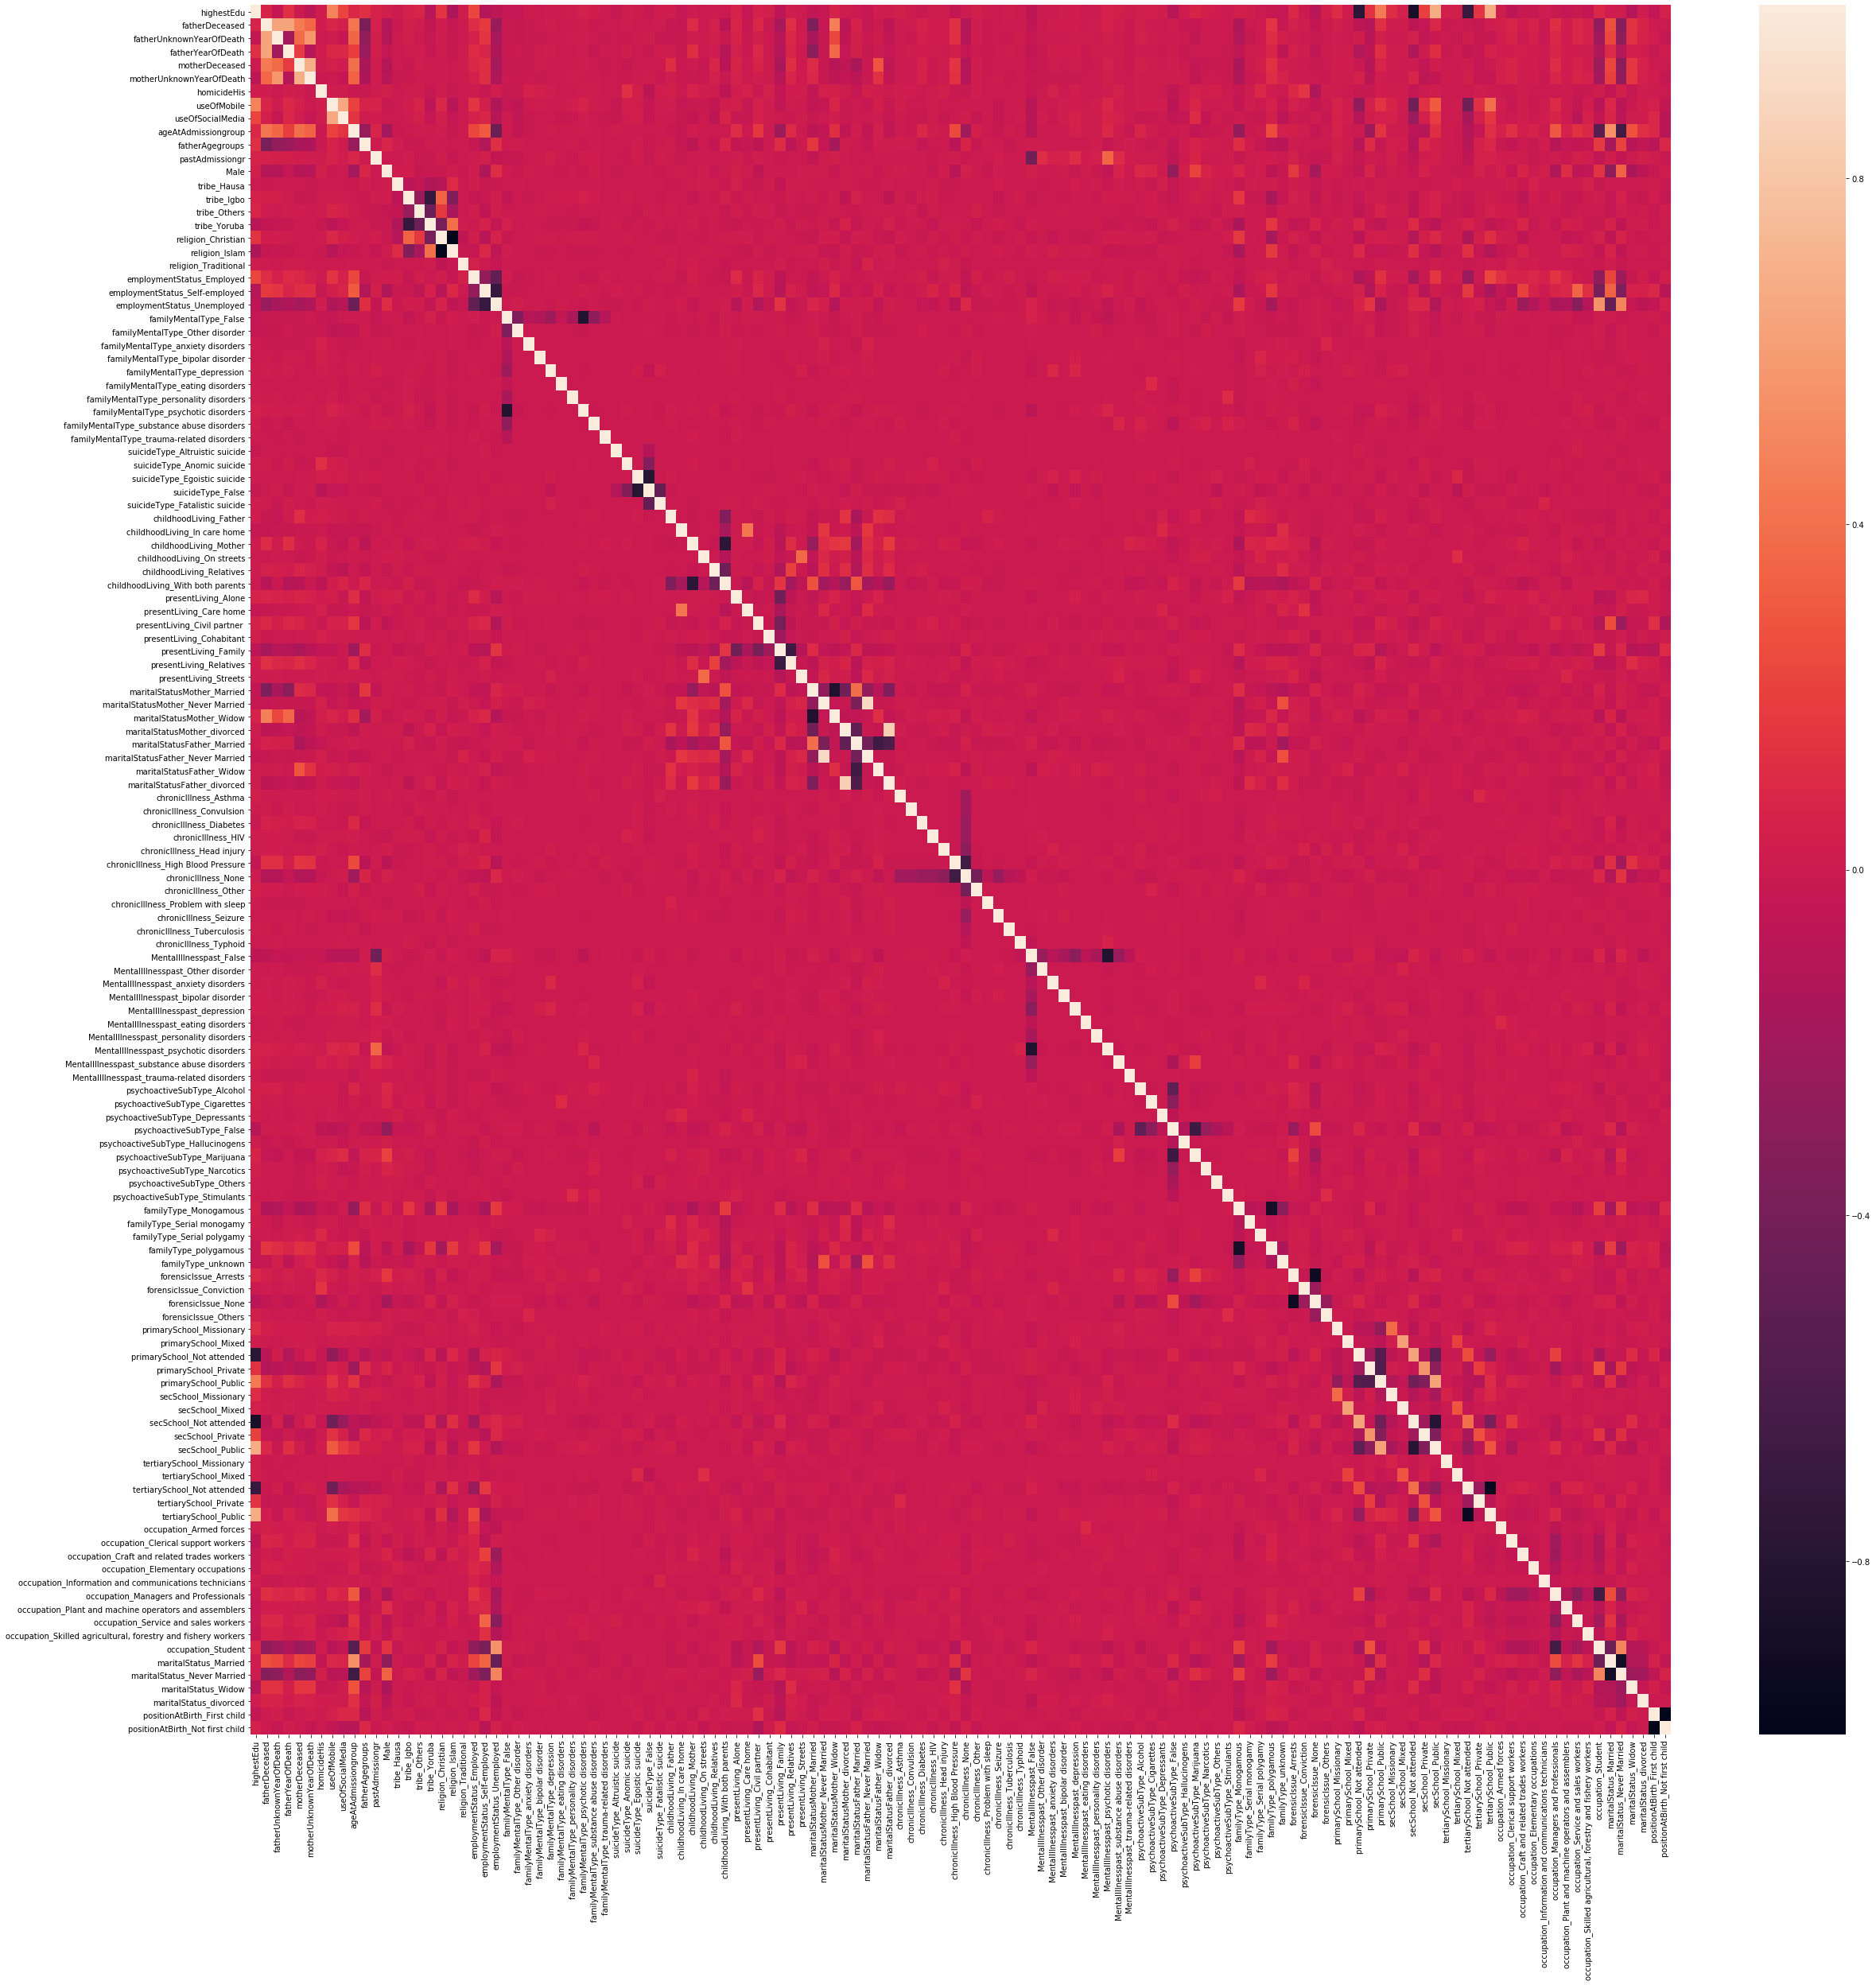

In [138]:
plt.figure(figsize=(40,40)) 
sns.heatmap(data.corr())

In [139]:
df = data.copy()

In [140]:
df.drop(['diagnosis'], axis=1, inplace = True)

In [141]:
df.shape

(9090, 130)

In [142]:
def get_redundant_pairs(df):
    #Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print()
print(get_top_abs_correlations(df, 40))

Top Absolute Correlations

positionAtBirth_First child            positionAtBirth_Not first child          1.000000
religion_Christian                     religion_Islam                           0.996965
tertiarySchool_Not attended            tertiarySchool_Public                    0.957411
forensicIssue_Arrests                  forensicIssue_None                       0.936017
maritalStatusMother_Never Married      maritalStatusFather_Never Married        0.898448
maritalStatus_Married                  maritalStatus_Never Married              0.897159
familyType_Monogamous                  familyType_polygamous                    0.884206
highestEdu                             secSchool_Not attended                   0.873312
maritalStatusMother_divorced           maritalStatusFather_divorced             0.845377
maritalStatusMother_Married            maritalStatusMother_Widow                0.830501
MentalIllnesspast_False                MentalIllnesspast_psychotic disorders    0.8

In [143]:
df.drop(['positionAtBirth_Not first child','religion_Islam', 'tertiarySchool_Public', 'forensicIssue_None', 'maritalStatusFather_Never Married',  'maritalStatus_Never Married', 'familyType_polygamous', 'secSchool_Not attended', 'maritalStatusFather_divorced', 'useOfSocialMedia', 'maritalStatusMother_Widow', 'motherUnknownYearOfDeath', 'MentalIllnesspast_psychotic disorders', 'familyMentalType_psychotic disorders', 'secSchool_Public', 'suicideType_False', 'primarySchool_Not attended', 'tertiarySchool_Not attended', 'secSchool_Not attended','childhoodLiving_With both parents','tribe_Yoruba', 'fatherUnknownYearOfDeath', 'fatherYearOfDeath', 'employmentStatus_Unemployed'  ], axis=1, inplace = True)

# 7. Saving the finished dataframe

In [144]:
# target variable column
tv = data['diagnosis']

In [145]:
# encoded features must be linked with the target variable using concatenation
df1 = pd.concat([df, tv], axis=1)

In [146]:
df1

,highestEdu,fatherDeceased,motherDeceased,homicideHis,useOfMobile,ageAtAdmissiongroup,fatherAgegroups,pastAdmissiongr,Male,tribe_Hausa,tribe_Igbo,tribe_Others,religion_Christian,religion_Traditional,employmentStatus_Employed,employmentStatus_Self-employed,familyMentalType_False,familyMentalType_Other disorder,familyMentalType_anxiety disorders,familyMentalType_bipolar disorder,familyMentalType_depression,familyMentalType_eating disorders,familyMentalType_personality disorders,familyMentalType_substance abuse disorders,familyMentalType_trauma-related disorders,...,primarySchool_Missionary,primarySchool_Mixed,primarySchool_Private,primarySchool_Public,secSchool_Missionary,secSchool_Mixed,secSchool_Private,tertiarySchool_Missionary,tertiarySchool_Mixed,tertiarySchool_Private,occupation_Armed forces,occupation_Clerical support workers,occupation_Craft and related trades workers,occupation_Elementary occupations,occupation_Information and communications technicians,occupation_Managers and Professionals,occupation_Plant and machine operators and assemblers,occupation_Service and sales workers,"occupation_Skilled agricultural, forestry and fishery workers",occupation_Student,maritalStatus_Married,maritalStatus_Widow,maritalStatus_divorced,positionAtBirth_First child,diagnosis
11,3,0,0,1,4,4,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Other
12,4,0,0,0,2,4,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,Other
14,2,0,0,0,3,2,3,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Depression
15,1,1,1,1,3,4,2,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,Other
16,1,0,0,0,3,4,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Depression
17,3,0,0,0,1,2,2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Seizure disorder
19,3,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,psychotic disorder
20,2,0,0,0,1,5,1,3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,Dementia
21,1,0,0,0,3,4,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,Dementia
22,4,1,0,0,3,4,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Schizophrenia


In [147]:
# Save to excel file
df1.to_excel("prepareddata.xlsx")  

In [ ]:
#### END ####